In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('SMPcap 2021.csv')
df.head(5)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/5/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [59]:
2151261235 % 16 + 1

4

- Chọn cột dữ liệu theo mã sinh viên
- Nguyễn Tuấn Kiệt: Cột 4, cột 5, cột 6

In [63]:
data = feats = ['4', '5', '6']

In [13]:
df[feats].head()

,4,5,6
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.0
4,1061.5,1061.5,1061.5


### 1. EDA dữ liệu

1.1. Kiểm tra dữ liệu thiếu

In [14]:
df[feats].isna().mean()

4    0.0
5    0.0
6    0.0
dtype: float64

- 2 cột đều không có dữ liệu thiếu

1.2. Sử dụng biểu đồ heatmap đề kiểm tra độ tương quan của dữ liệu

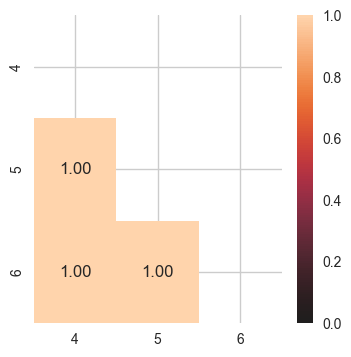

In [15]:
mask = np.triu(np.ones_like(df[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(df[feats].corr(), mask=mask, vmax=1, vmin=0, center=0,annot=True,fmt='.2f');

- Biểu đồ cho thấy 2 cột có độ tương quan dương và rất tương quan

1.3. Biểu đồ đường thể hiện dữ liệu qua thời gian

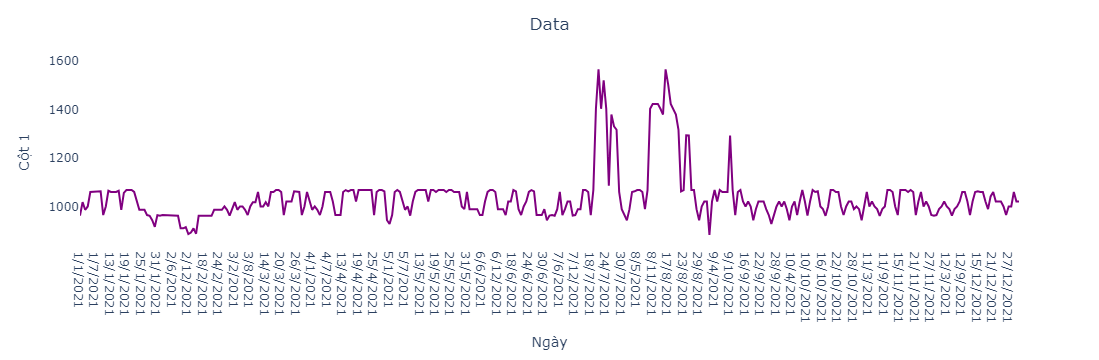

In [16]:
import plotly.express as px
fig = px.line(y=df['4'], x=df['Ngày'])
fig.update_traces(line_color='purple') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

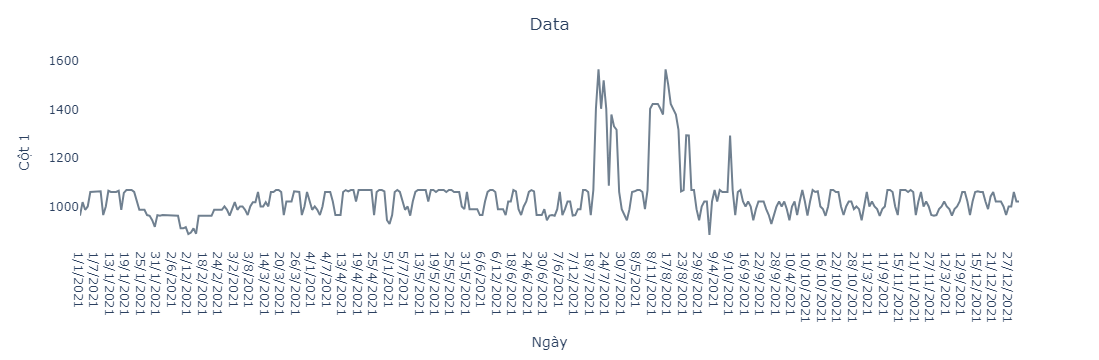

In [17]:
fig = px.line(y=df['5'], x=df['Ngày'])
fig.update_traces(line_color='slategray') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

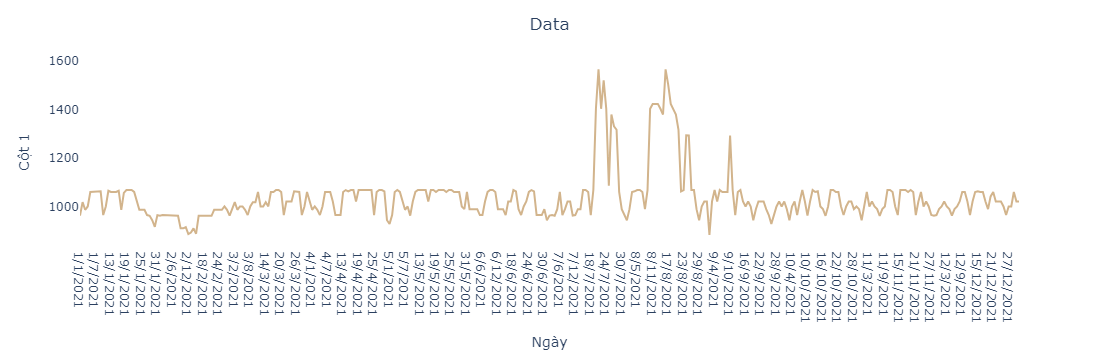

In [18]:
fig = px.line(y=df['6'], x=df['Ngày'])
fig.update_traces(line_color='tan') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="Cột 1",
                  title={'text': "Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,255,255,0.8)')

- Scale dữ liệu

In [19]:
transformer = StandardScaler()
X = transformer.fit_transform(np.array(df[feats]))

- Dữ liệu sau khi scale

In [20]:
X[:5]

array([[-0.72215304, -0.72216096, -0.72216134],
       [-0.19550131, -0.19550725, -0.19550736],
       [-0.49358809, -0.49359515, -0.49359542],
       [-0.36406796, -0.36407453, -0.36407473],
       [ 0.20258265,  0.20257818,  0.20257829]])

- Sử dụng phương pháp Elbow để xác định số cụm thông qua KMeans
- Chạy số cụm từ 3-12 xem số cụm nào có sự phân chia cụm có điểm số cao nhất

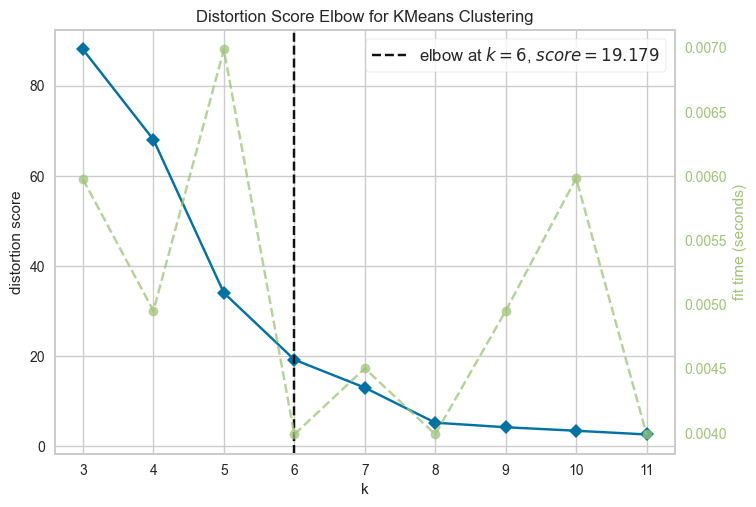

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

### 2. Sử dụng Bayesian Gaussian Mixture

#### Thử nghiệm với K = 6

In [22]:
BGM = BayesianGaussianMixture(n_components=6,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [23]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

- Tạo bộ phân loại

In [25]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.00596865
[400]	valid_0's multi_logloss: 0.00597142
[200]	valid_0's multi_logloss: 0.00288963
[400]	valid_0's multi_logloss: 0.00286064
[600]	valid_0's multi_logloss: 0.00284089
[800]	valid_0's multi_logloss: 0.00282657
[1000]	valid_0's multi_logloss: 0.00281573
[1200]	valid_0's multi_logloss: 0.00280725
[1400]	valid_0's multi_logloss: 0.00280043
[1600]	valid_0's multi_logloss: 0.00279484
[1800]	valid_0's multi_logloss: 0.00277218
[2000]	valid_0's multi_logloss: 0.00276818
[2200]	valid_0's multi_logloss: 0.00276475
[2400]	valid_0's multi_logloss: 0.00276177
[2600]	valid_0's multi_logloss: 0.00275916
[2800]	valid_0's multi_logloss: 0.00275686
[3000]	valid_0's multi_logloss: 0.00275481
[3200]	valid_0's multi_logloss: 0.00275298
[3400]	valid_0's multi_logloss: 0.00275133
[3600]	valid_0's multi_logloss: 0.00274984
[3800]	valid_0's multi_logloss: 0.00274848
[4000]	valid_0's multi_logloss: 0.00274724
[4200]	valid_0's multi_logloss: 0.00274611
[4400]	valid_0's 

In [26]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [27]:
labels=np.argmax(lgb_preds,axis=1)

- Nhãn của từng điểm dữ liệu sau khi training xong

In [28]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

- Có 4 nhãn tương ứng 4 cụm

C:\Users\kiet6\AppData\Local\Temp\ipykernel_10232\428648412.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



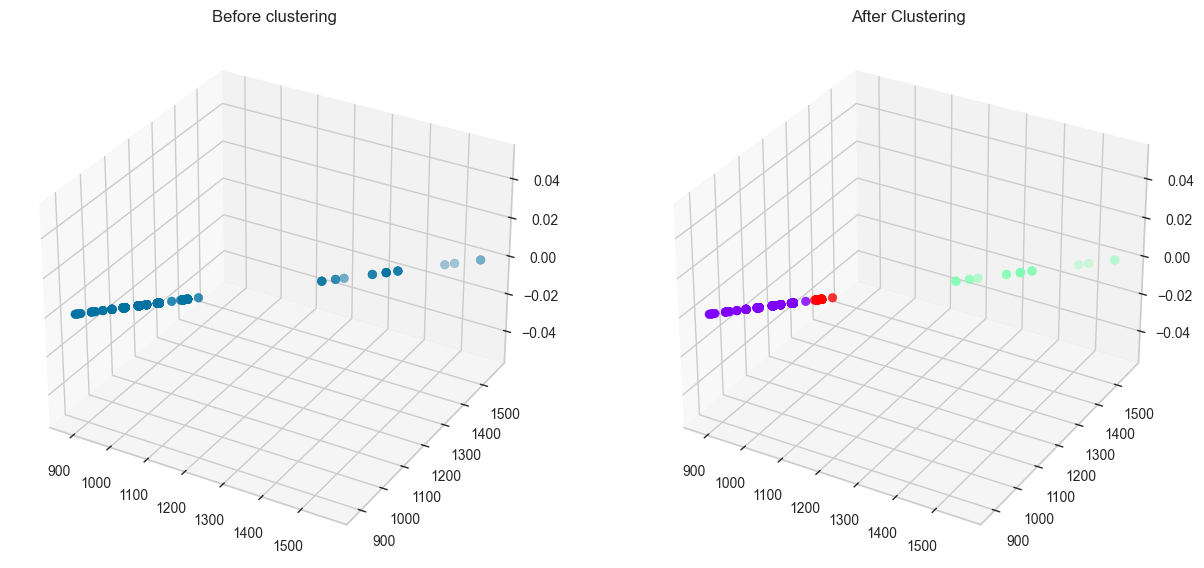

In [29]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['1'], df['2'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['1'], df['2'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

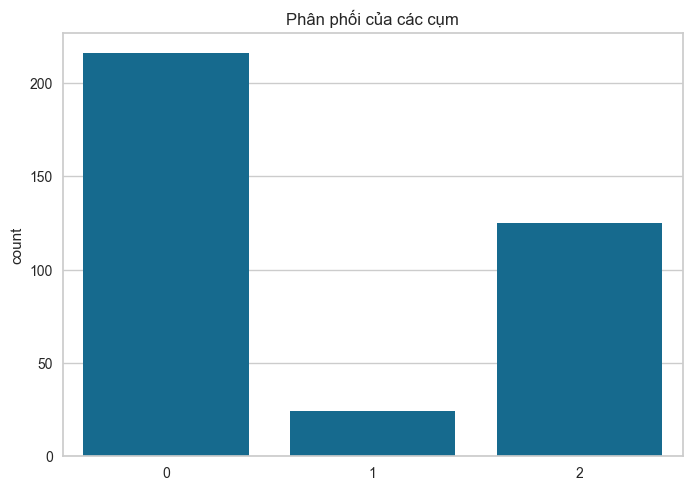

In [30]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ phân phối => các cụm được phân chia chưa đồng đều

#### Thử nghiệm với k=4

In [31]:
BGM = BayesianGaussianMixture(n_components=4,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [32]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(4)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(4):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

- Tạo bộ phân loại

In [33]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.00595087
[200]	valid_0's multi_logloss: 0.00296352
[400]	valid_0's multi_logloss: 0.00290952
[600]	valid_0's multi_logloss: 0.00287654
[800]	valid_0's multi_logloss: 0.00285444
[1000]	valid_0's multi_logloss: 0.00283862
[1200]	valid_0's multi_logloss: 0.00282676
[1400]	valid_0's multi_logloss: 0.00281754
[1600]	valid_0's multi_logloss: 0.00281018
[1800]	valid_0's multi_logloss: 0.00280416
[2000]	valid_0's multi_logloss: 0.00279916
[2200]	valid_0's multi_logloss: 0.00279493
[2400]	valid_0's multi_logloss: 0.00279131
[2600]	valid_0's multi_logloss: 0.00278818
[2800]	valid_0's multi_logloss: 0.00278544
[3000]	valid_0's multi_logloss: 0.00278303
[3200]	valid_0's multi_logloss: 0.00278089
[3400]	valid_0's multi_logloss: 0.00277898
[3600]	valid_0's multi_logloss: 0.00277726
[3800]	valid_0's multi_logloss: 0.0027757
[4000]	valid_0's multi_logloss: 0.00277429
[4200]	valid_0's multi_logloss: 0.002773
[4400]	valid_0's multi_logloss: 0.00277182
[4600]	valid_0's mu

In [34]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

- Nhãn sau khi phân loại có 3 nhãn

In [35]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\kiet6\AppData\Local\Temp\ipykernel_10232\2462911354.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



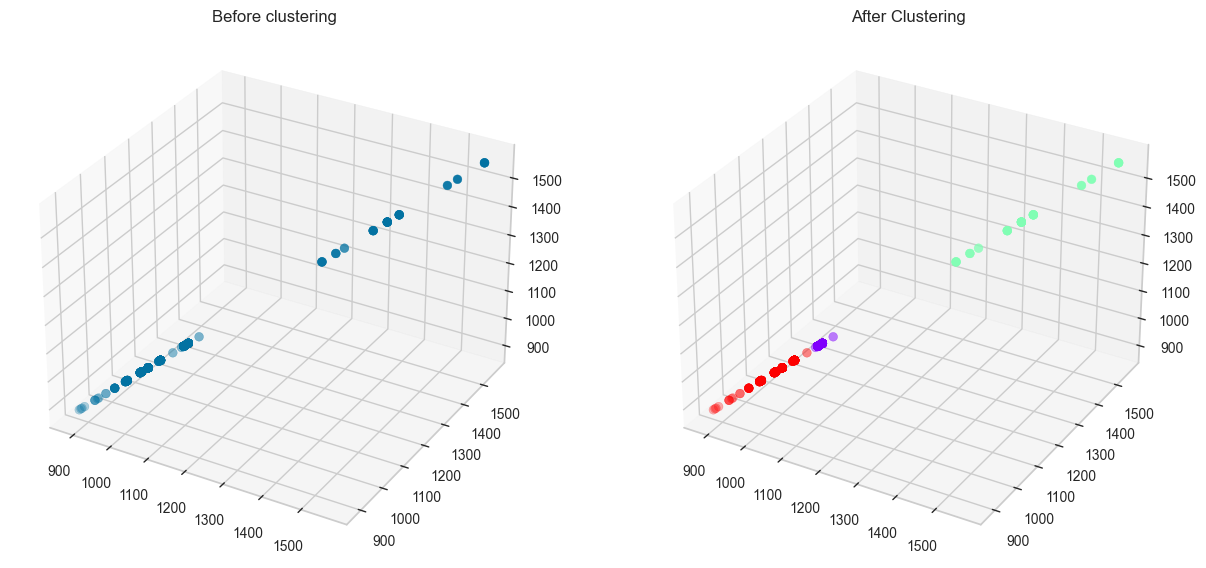

In [38]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['4'], df['5'],df['6'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['4'], df['5'],df['6'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

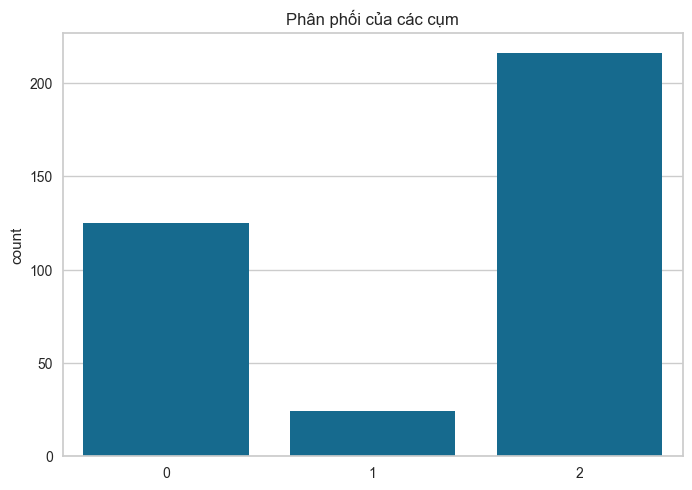

In [37]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ biểu đồ số cụm đã được phân chia đồng đều hơn

#### Thử nghiệm với K=3

In [43]:
BGM = BayesianGaussianMixture(n_components=3,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

In [44]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(3)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(3):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [45]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.00596865
[400]	valid_0's multi_logloss: 0.00597142
[200]	valid_0's multi_logloss: 0.00288963
[400]	valid_0's multi_logloss: 0.00286064
[600]	valid_0's multi_logloss: 0.00284089
[800]	valid_0's multi_logloss: 0.00282657
[1000]	valid_0's multi_logloss: 0.00281573
[1200]	valid_0's multi_logloss: 0.00280725
[1400]	valid_0's multi_logloss: 0.00280043
[1600]	valid_0's multi_logloss: 0.00279484
[1800]	valid_0's multi_logloss: 0.00277218
[2000]	valid_0's multi_logloss: 0.00276818
[2200]	valid_0's multi_logloss: 0.00276475
[2400]	valid_0's multi_logloss: 0.00276177
[2600]	valid_0's multi_logloss: 0.00275916
[2800]	valid_0's multi_logloss: 0.00275686
[3000]	valid_0's multi_logloss: 0.00275481
[3200]	valid_0's multi_logloss: 0.00275298
[3400]	valid_0's multi_logloss: 0.00275133
[3600]	valid_0's multi_logloss: 0.00274984
[3800]	valid_0's multi_logloss: 0.00274848
[4000]	valid_0's multi_logloss: 0.00274724
[4200]	valid_0's multi_logloss: 0.00274611
[4400]	valid_0's 

In [46]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [47]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\kiet6\AppData\Local\Temp\ipykernel_10232\2462911354.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



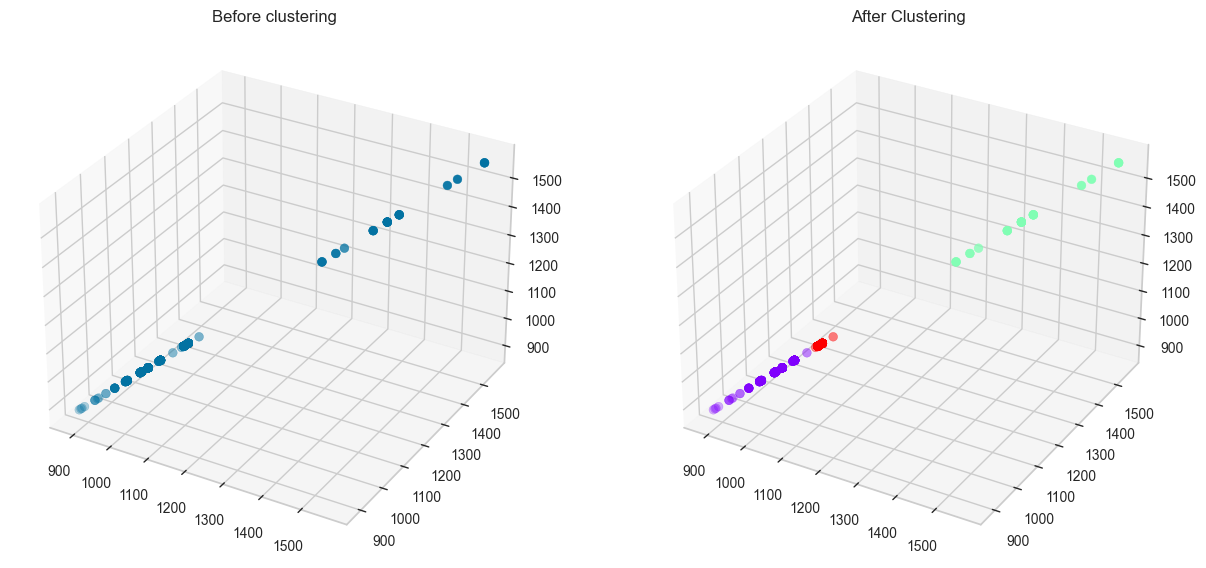

In [48]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['4'], df['5'],df['6'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['4'], df['5'],df['6'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

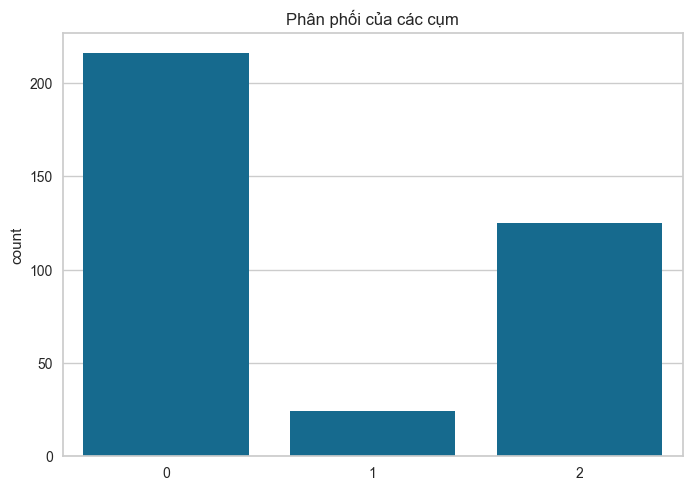

In [49]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

In [65]:
data = df[['4', '5', '6']]

In [66]:
test_size = 0.2 * data.shape[0]
test_size = int(test_size)
test_size

73

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=3)

kf = kf.em(data.values[:-test_size], n_iter=10)

state_means, state_covariances = kf.smooth(data.values[-test_size:])

In [69]:
state_means.shape

(73, 1)

In [70]:
data.values[-test_size:][:, 0]

array([1069.4, 1061.5, 1061.5, 1002. ,  966.7, 1002. , 1022.6, 1022.6,
        990.9, 1002. ,  990.9,  945.4, 1002. , 1061.5, 1002. , 1022.6,
       1002. ,  990.9,  963.6,  990.9, 1002. , 1069.4, 1069.4, 1061.5,
       1002. ,  966.7, 1069.4, 1069.4, 1069.4, 1061.5, 1069.4, 1061.5,
        966.7, 1022.6, 1061.5, 1002. , 1022.6, 1002.1,  966.8,  963.6,
        966.7,  990.9, 1002.1, 1022.6, 1002. ,  990.9,  964.4,  990.9,
       1002. , 1022.6, 1061.5, 1061.5, 1022.6,  966.7, 1022.6, 1061.5,
       1064.1, 1061.5, 1061.5, 1022.6,  990.9, 1043.3, 1061.5, 1022.6,
       1022.6, 1022.6, 1002. ,  966.7, 1002. , 1002. , 1061.5, 1022.6,
       1022.6])

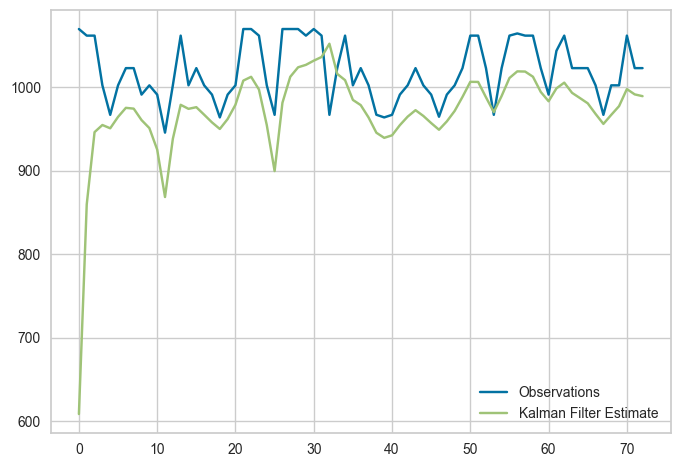

In [71]:
# Vẽ kết quả
plt.plot(data.values[-test_size:][:,0], label='Observations')
plt.plot(state_means, label='Kalman Filter Estimate')
plt.legend()
plt.show()